In [39]:
from __future__ import division
import numpy as np
import scipy as sp
import math
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from clustering import cluster_lab
from generate_data import gen_data
from pred_analysis import *
import init_dict
import scipy.stats as st
from cycler import cycler

In [265]:
df1 = pd.read_csv('dl_1.0.csv')
df2 = pd.read_csv('dl_0.5.csv')
df3 = pd.read_csv('dl_0.2.csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
print len(df)
df.head()

898


,m,n,k,p,L,G,r,lda,u,init_fit,bcs_fit,cs_fit,minc,maxc,mink0,maxk0,avgk_0,mink1,maxk1,avgk_1
0,50,200,1,10,100,1000,0.2,5,1.0,0.502596,0.494245,1.0,0.000028,0.356919,0.385,0.826,0.613692,0.402,0.844,0.580308
1,50,200,1,10,100,1000,0.2,25,1.0,-0.019444,-0.042630,1.0,0.000008,0.130334,0.030,0.504,0.169654,0.062,0.656,0.223269
2,50,200,1,10,100,1000,0.2,45,1.0,0.211343,0.112087,1.0,0.000031,0.155110,0.009,1.000,0.609115,0.020,0.664,0.368462
3,50,200,1,10,100,1000,0.2,65,1.0,0.665538,0.159284,1.0,0.000026,0.162638,1.000,1.000,1.000000,0.148,0.587,0.231462
4,50,200,1,10,100,1000,0.2,85,1.0,0.464861,0.048999,1.0,0.000003,0.257763,0.001,1.000,0.811923,0.001,0.600,0.172038


In [266]:
df.to_csv('dl_density.csv',index_label=False )

In [267]:
df['density_diff']= -df.u + df.avgk_1

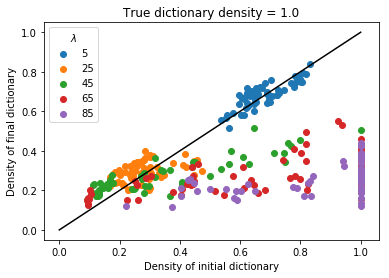

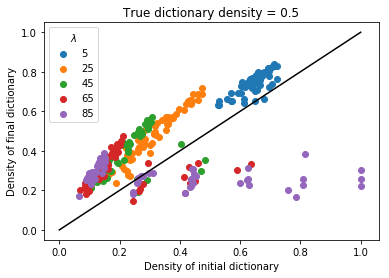

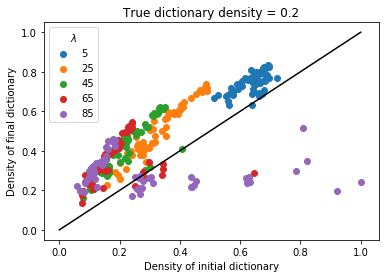

In [268]:
plt.figure()
groups = df1.groupby('lda')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Density of initial dictionary')
plt.ylabel('Density of final dictionary')
plt.legend(title=r'$\lambda$')
plt.title('True dictionary density = 1.0')

plt.figure()
groups = df2.groupby('lda')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Density of initial dictionary')
plt.ylabel('Density of final dictionary')
plt.legend(title=r'$\lambda$')
plt.title('True dictionary density = 0.5')

plt.figure()
groups = df3.groupby('lda')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Density of initial dictionary')
plt.ylabel('Density of final dictionary')
plt.legend(title=r'$\lambda$')
plt.title('True dictionary density = 0.2')

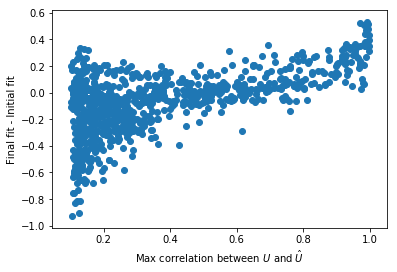

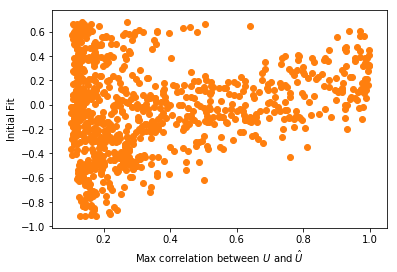

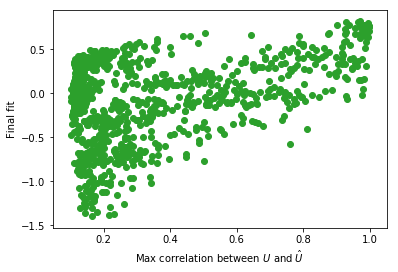

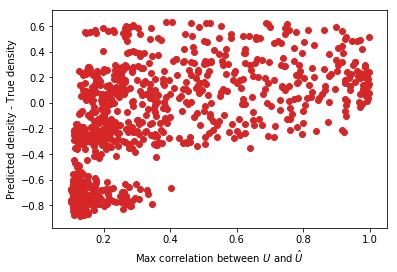

In [295]:
s = df
plt.scatter(s.maxc , s.bcs_fit- s.init_fit, label = 'Initial Fit')
plt.xlabel('Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Final fit - Initial fit')

plt.figure()
plt.scatter(s.maxc, s.init_fit, color='C1')
plt.xlabel('Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Initial Fit')

plt.figure()
plt.scatter(s.maxc, s.bcs_fit, color='C2')
plt.xlabel('Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Final fit')

plt.figure()
plt.scatter(s.maxc, s.density_diff, color='C3')
plt.xlabel('Max correlation between $U$ and $\hat{U}$')
plt.ylabel('Predicted density - True density')


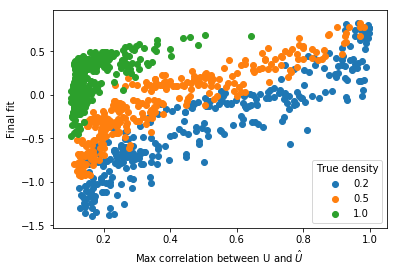

In [270]:
plt.figure()
groups = df.groupby('u')
for name, group in groups:
    plt.scatter(group.maxc, group.bcs_fit,label=name)
plt.xlabel('Max correlation between U and $\hat{U}$')
plt.ylabel('Final fit')
plt.legend(title='True density')


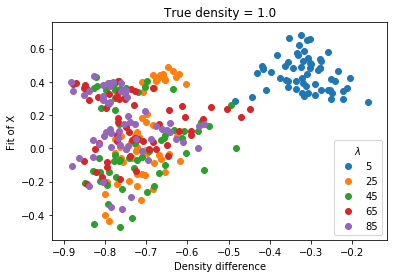

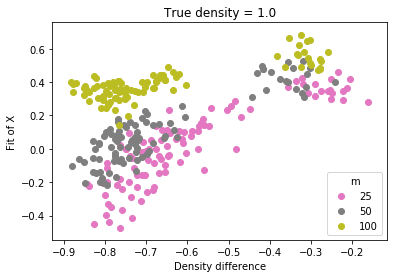

In [273]:
df1['density_diff'] = - df1.u + df1.avgk_1
groups = df1.groupby('lda')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='$\lambda$')
plt.title('True density = 1.0')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
df1['density_diff'] = - df1.u + df1.avgk_1
groups = df1.groupby('m')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='m')
plt.title('True density = 1.0')



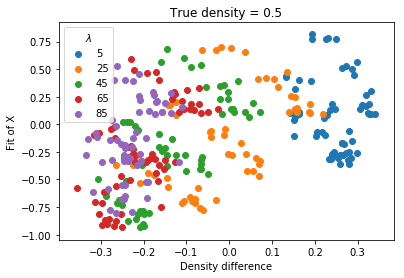

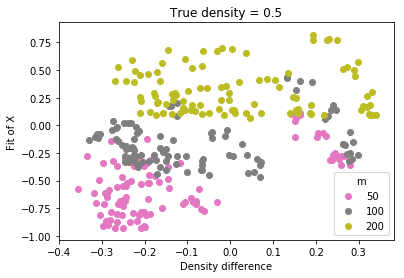

In [274]:

plt.figure()
df2['density_diff'] = - df2.u + df2.avgk_1
groups = df2.groupby('lda')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='$\lambda$')
plt.title('True density = 0.5')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
df2['density_diff'] = - df2.u + df2.avgk_1
groups = df2.groupby('m')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='m')
plt.title('True density = 0.5')

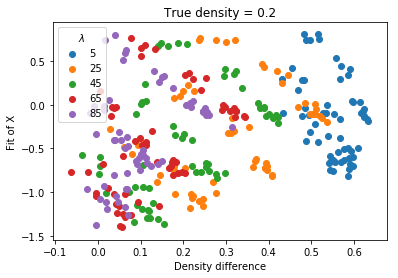

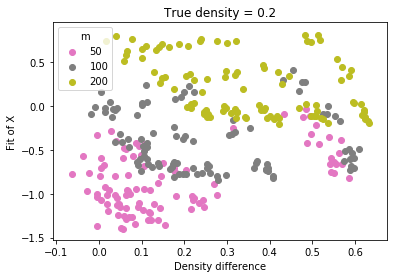

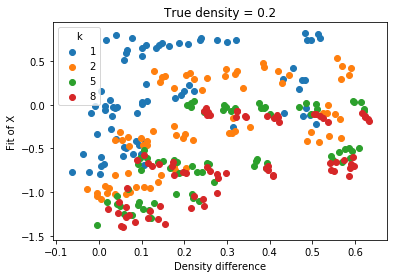

In [275]:
plt.figure()
df3['density_diff'] = - df3.u + df3.avgk_1
groups = df3.groupby('lda')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='$\lambda$')
plt.title('True density = 0.2')

plt.figure()
fig,ax = plt.subplots(1)
ax.set_prop_cycle(cycler('color', ['tab:pink', 'tab:gray', 'tab:olive',]))
df3['density_diff'] = - df3.u + df3.avgk_1
groups = df3.groupby('m')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='m')
plt.title('True density = 0.2')

plt.figure()
df3['density_diff'] = - df3.u + df3.avgk_1
groups = df3.groupby('k')
for name, group in groups:
    plt.scatter(group.density_diff, group.bcs_fit, label = name)
plt.xlabel('Density difference')
plt.ylabel('Fit of X')
plt.legend(title='k')
plt.title('True density = 0.2')

